# Embeddings and Pretrained networks

### Demand of computing power is growing faster than predicted by Moore's Law
__FLOPS__: FLoating point OPerations per Second<br>
What is a Peta FLOP (PFLOP)?<br>
pics are taken form [here](https://github.com/amirgholami/ai_and_memory_wall/tree/main/imgs/pngs)

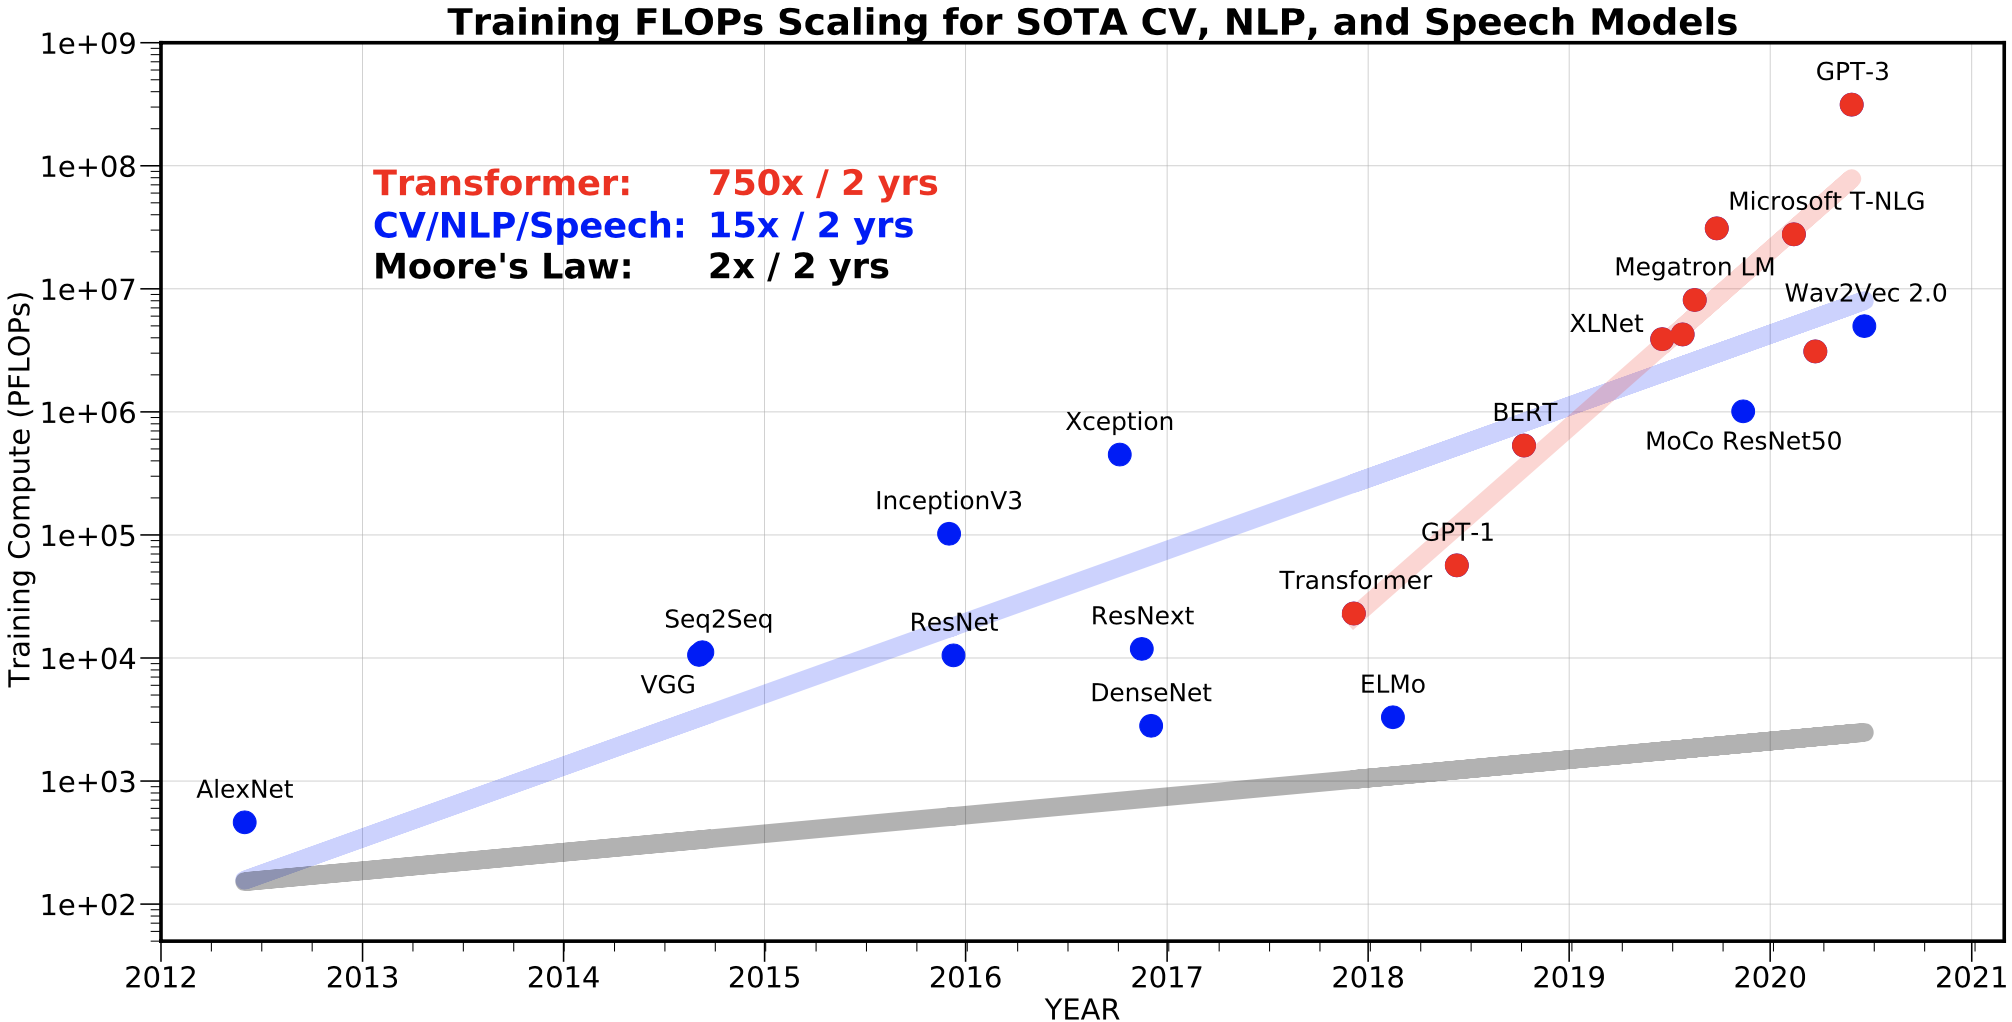

In [5]:
from IPython.display import Image
Image('../images/ai_and_compute.png')

### The number of parameters is growing faster than the memory of the accelerators 
The size of the Transformers grows 240 times every 2 years

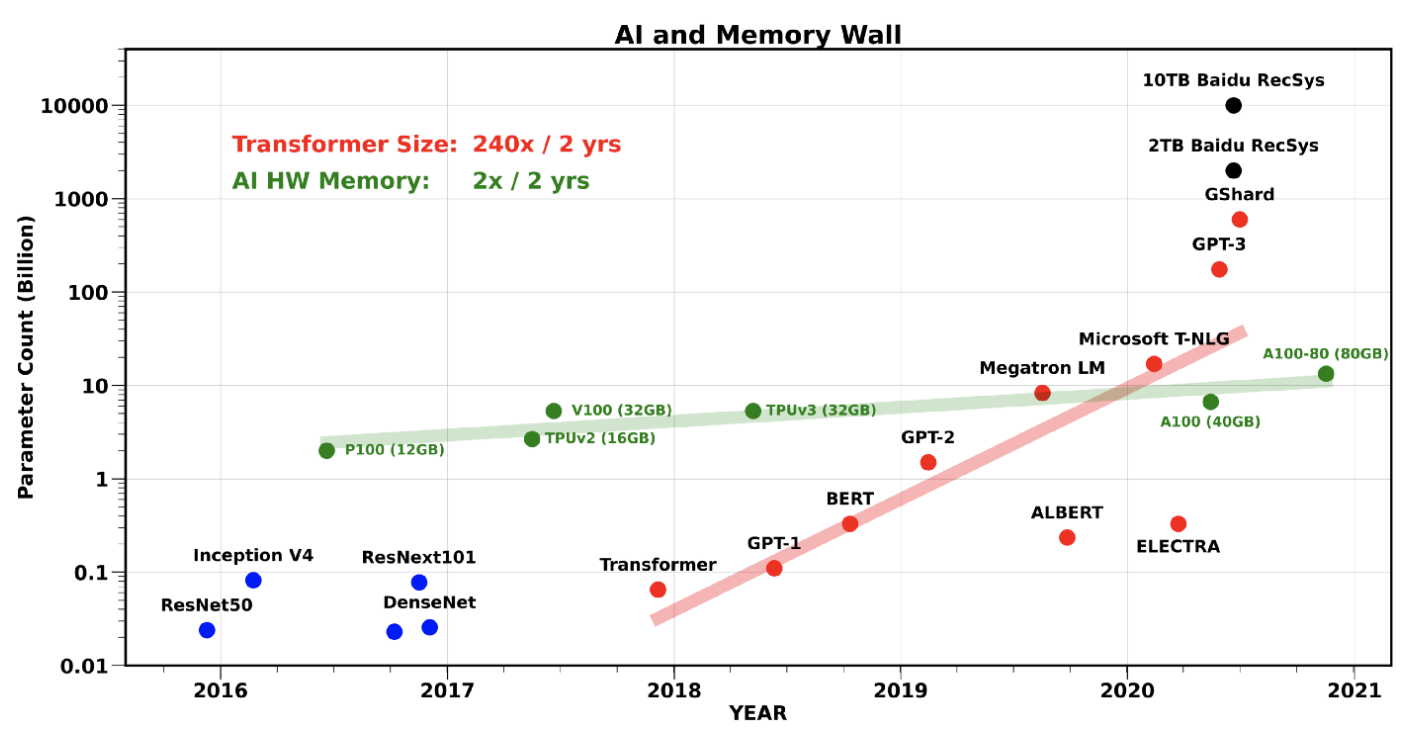

In [4]:
Image('../images/ai_memory_wall.png')

### Carbon Footprint of Neural Network Training
Copied from [here](https://arxiv.org/pdf/1906.02243.pdf)<br>
Please notice, that this is from 2019.

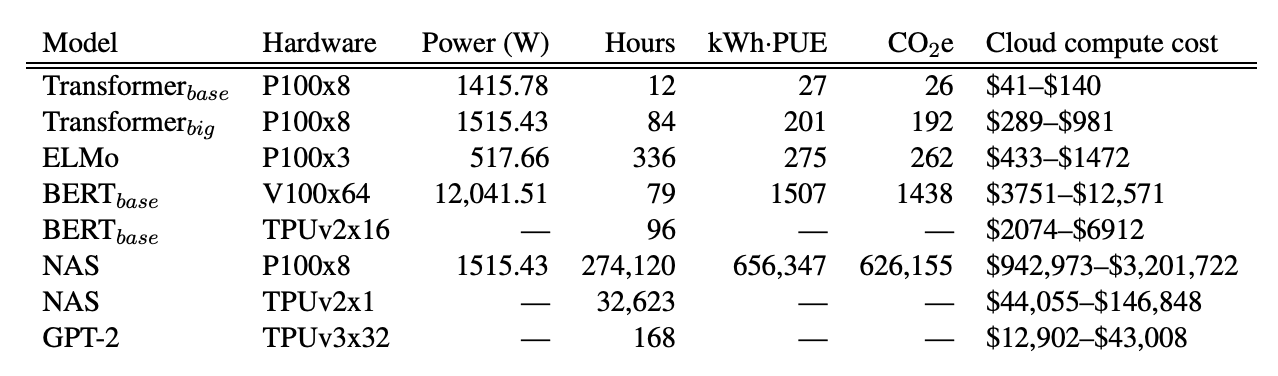

In [6]:
Image('../images/carbon_footprint1.png')

The next illustration is based on the same publication, but more approchable ;-)

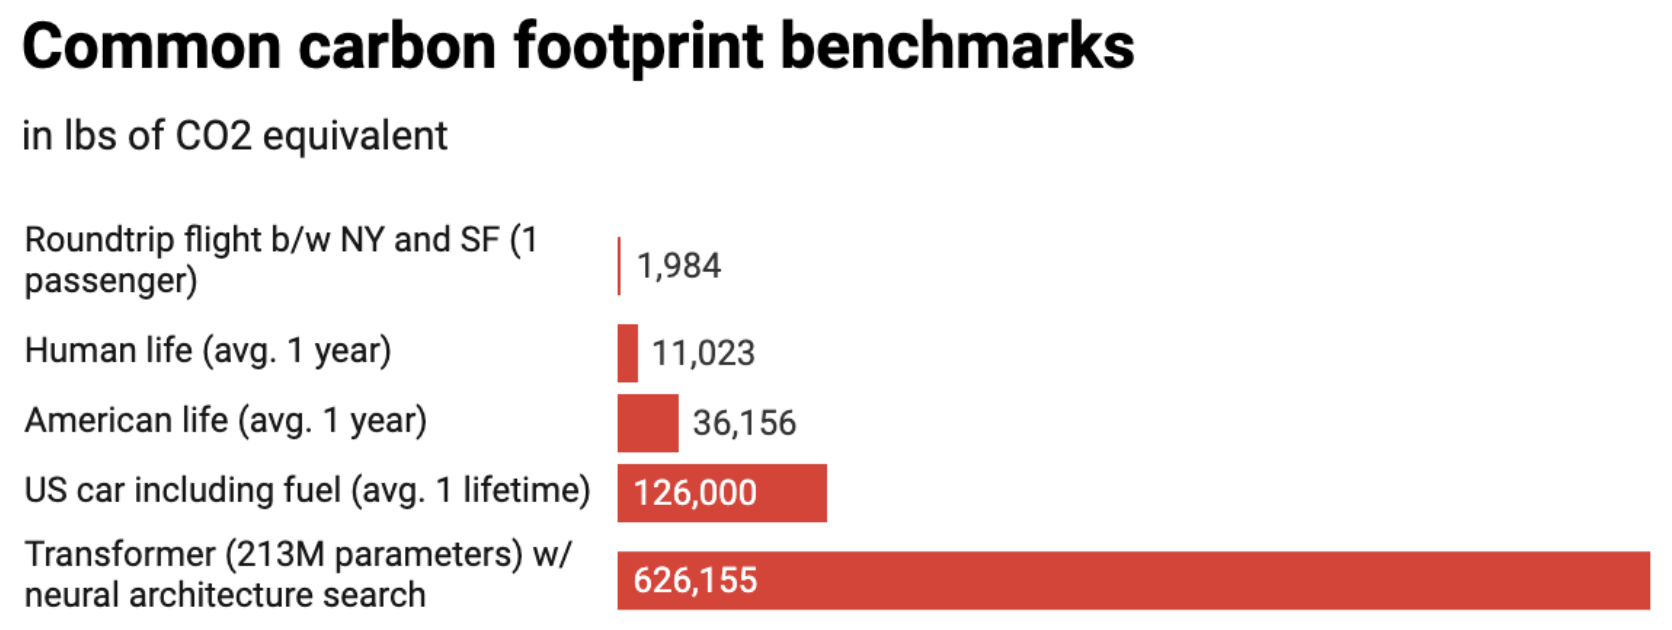

In [7]:
Image('../images/carbon_footprint2.png')

## The new reality in Data Science
[Han Xiao, 2019 Founder and CEO of Jina AI](https://hanxiao.io/2019/07/29/Generic-Neural-Elastic-Search-From-bert-as-service-and-Go-Way-Beyond/)

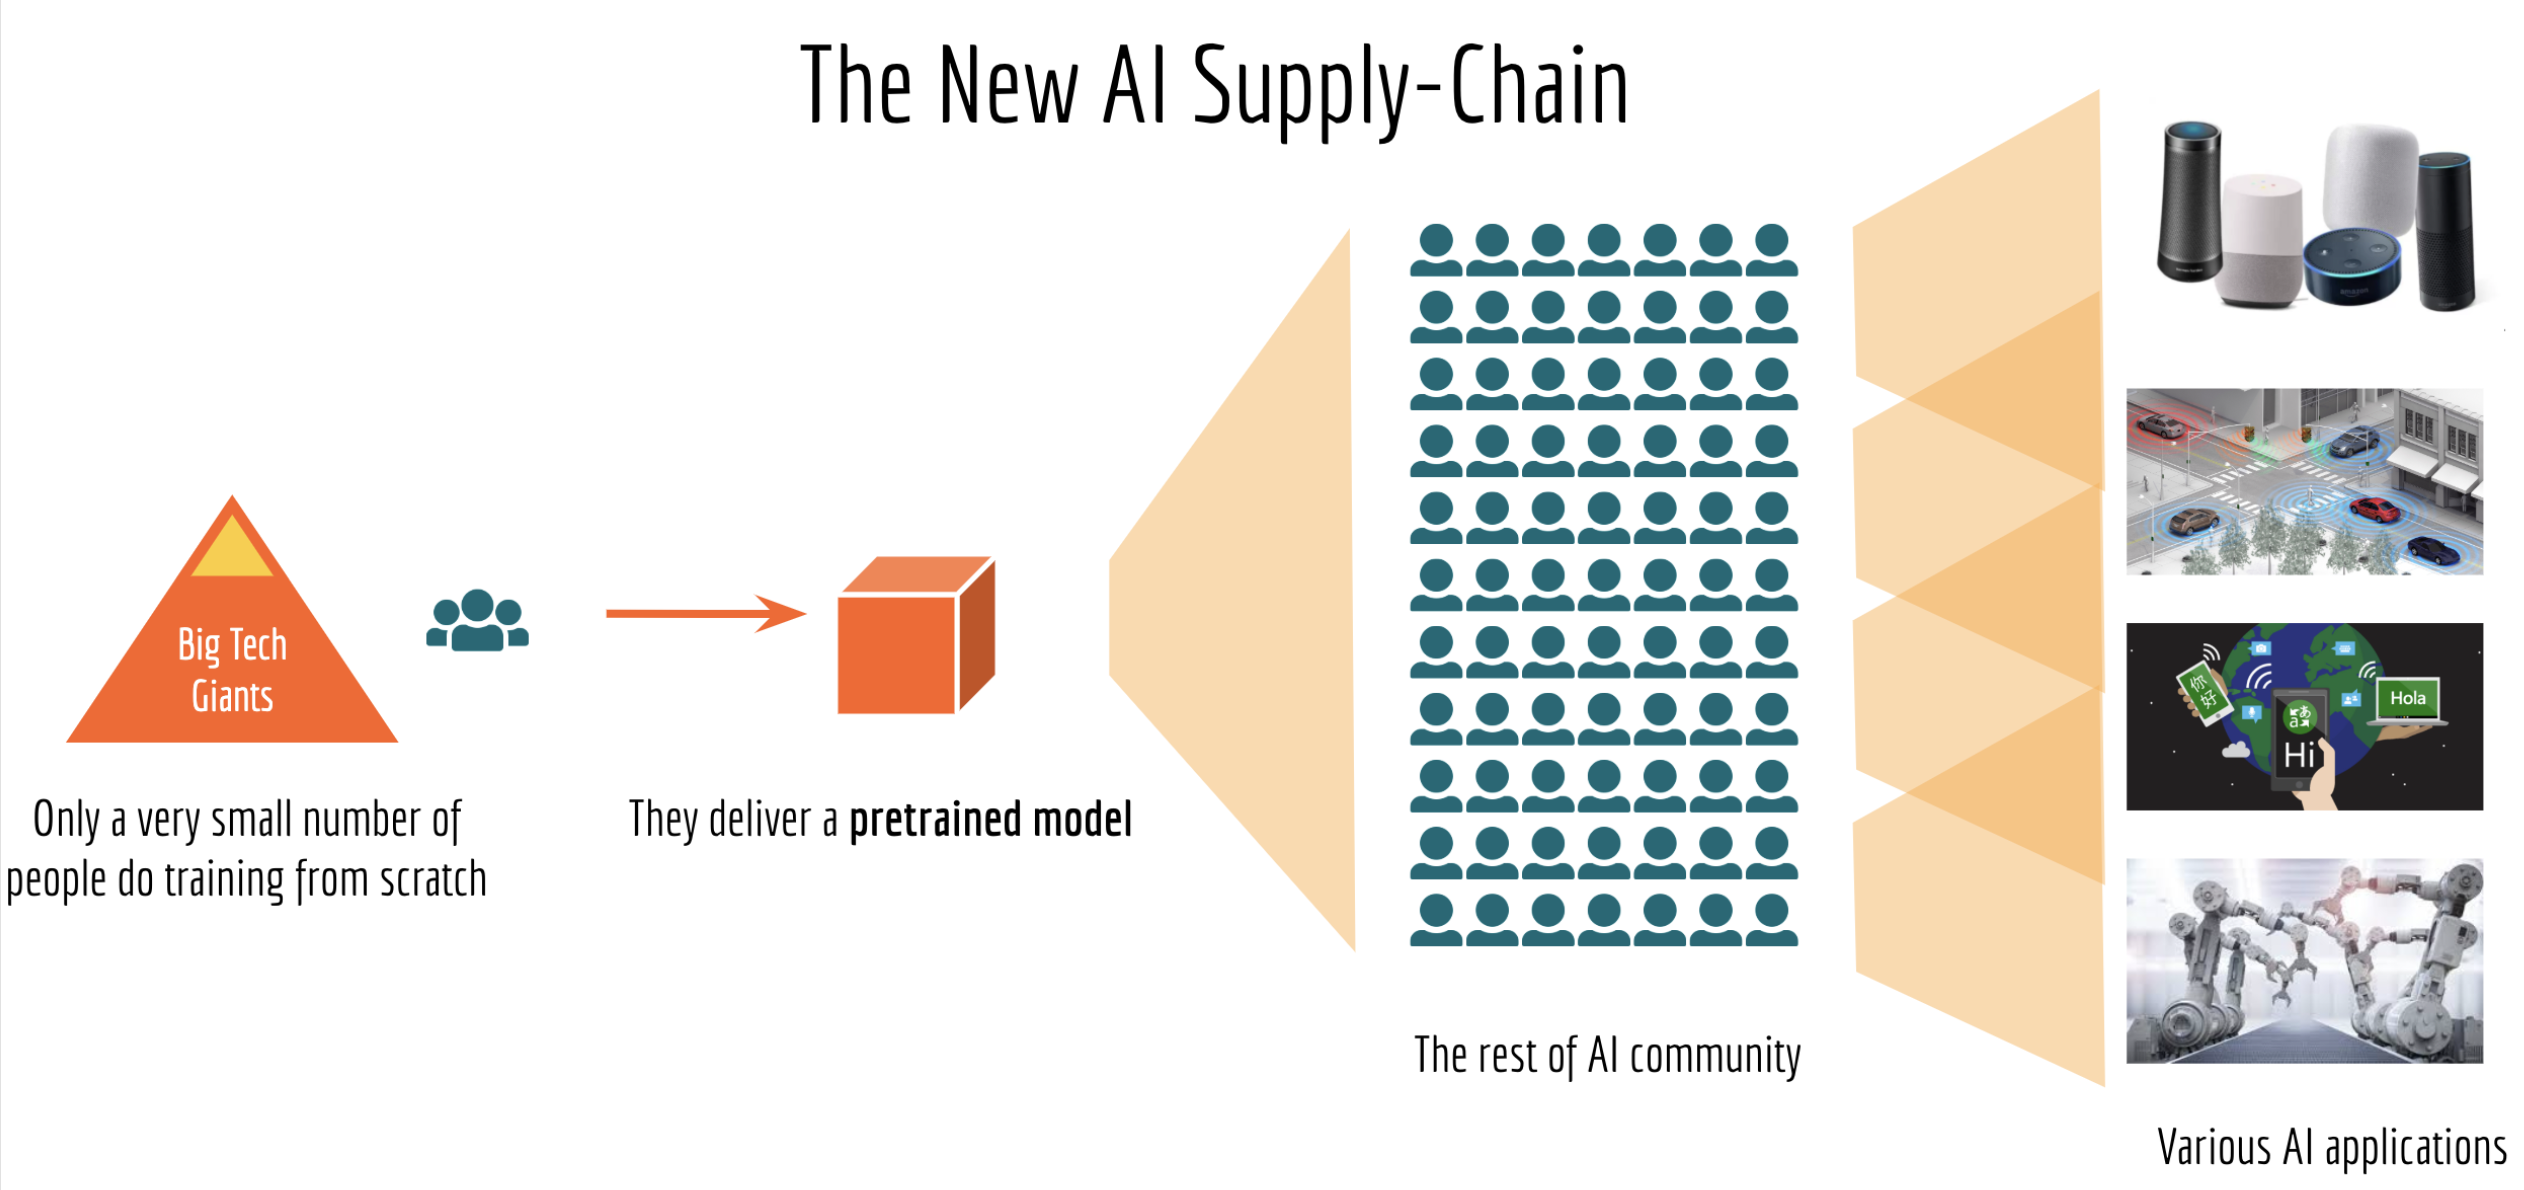

In [8]:
Image('../images/new_ai_supply_chain.png')

## Examples in NLP

### Glove
Glove dates from 2014. All relevant information can be found on the the [project site](https://nlp.stanford.edu/projects/glove/) hosted in stanford.
The algorithm is rather easy:<br>
"The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus."<br>
The basic idea applies to __word2vec__ as well as to __Glove__:

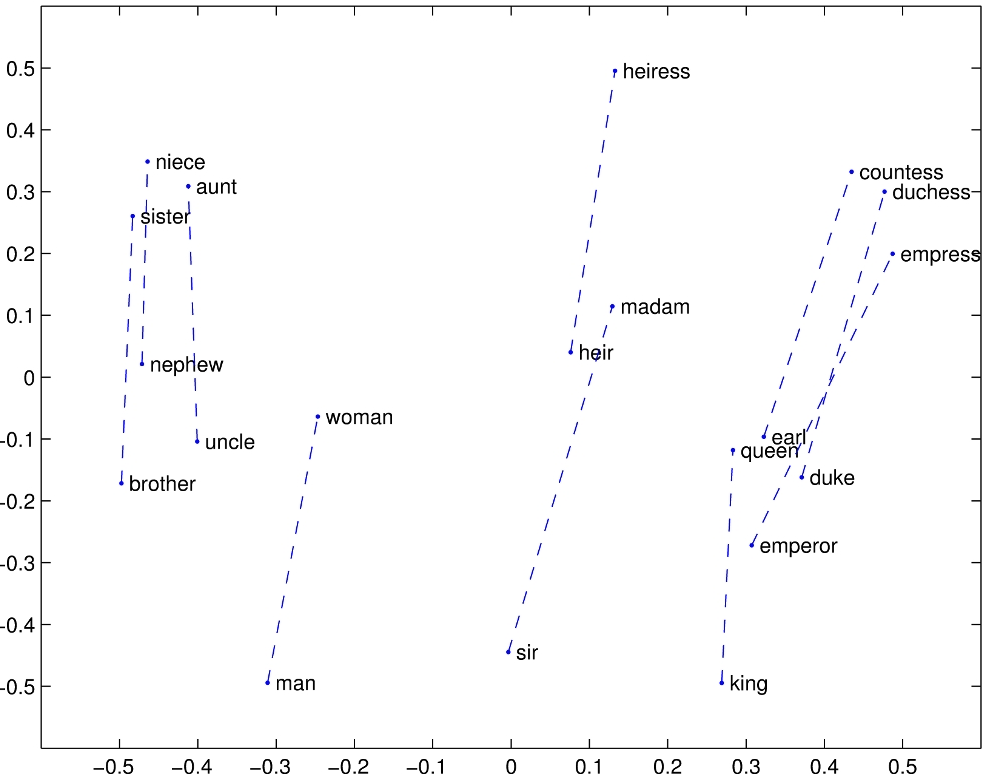

In [33]:
Image('../images/glove.png', width=480, height=480)

This is done with so-called matrix-factorization; The matrix is the co-occurence matrix of words in documents.<br>
The example below is a typical example of collaborative filtering. The matrix-factorization has become very popular in the recommender-system community due to the [1-Million-Dollar-Challenge by Netflix](https://en.wikipedia.org/wiki/Netflix_Prize).<br>
At start, each word (item, user) is given a random embedding vector. The scalar product (dot-product) between the vectors is asked to reconstruct the content of the respective cell. The error, i.e. the difference between the scalar-product and the actual content of the cell is propagated into the embedding vectors that are adapted accordingly.<br>
The resulting embeddings are able to reconstruct the word co-occurence matrix (or the ratings a user gave a certain movie). 

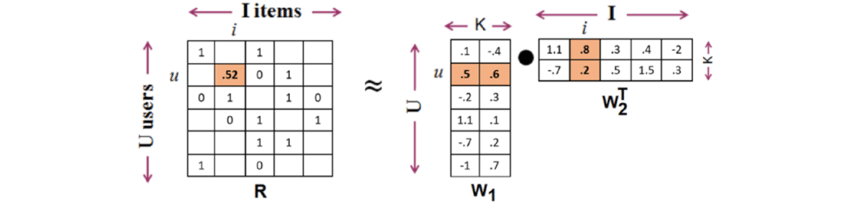

In [10]:
Image('../images/An-example-of-matrix-factorization.png')

### Word2Vec
[Word2Vec paper](https://arxiv.org/pdf/1301.3781v3.pdf)

CBOW: take the embeddings of the surrounding words and try to predict the masked (missing) word in the middle.

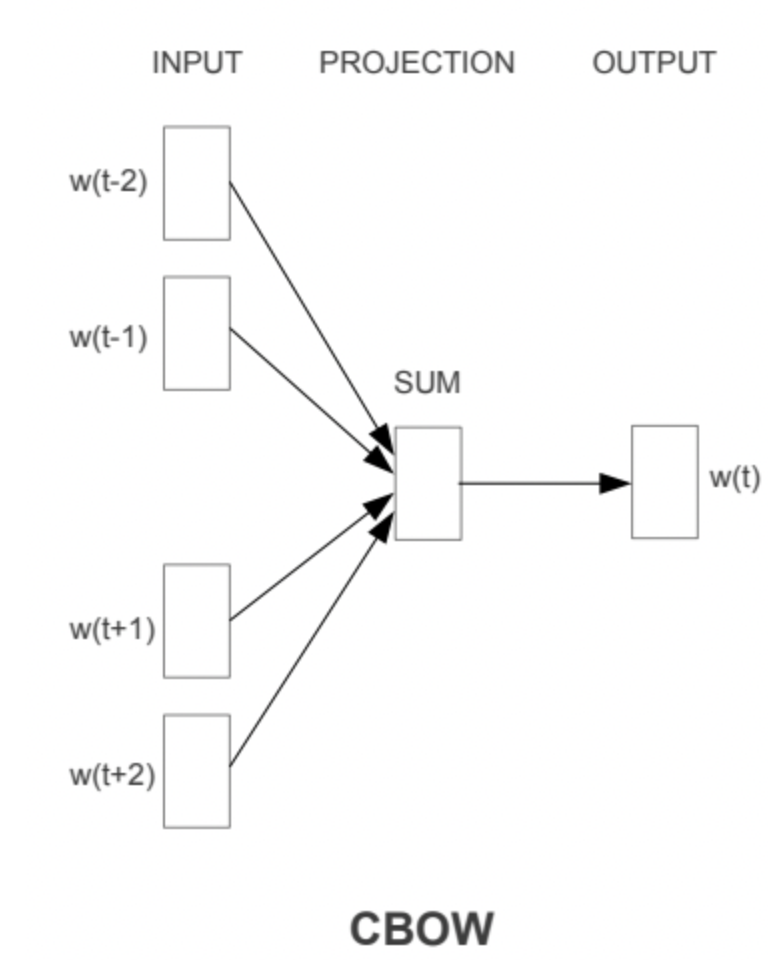

In [11]:
Image('../images/CBOW.png', width=320, height=320)

Skip-Gram: Take the embedding of the word in the middle and try to predict the words around it. 

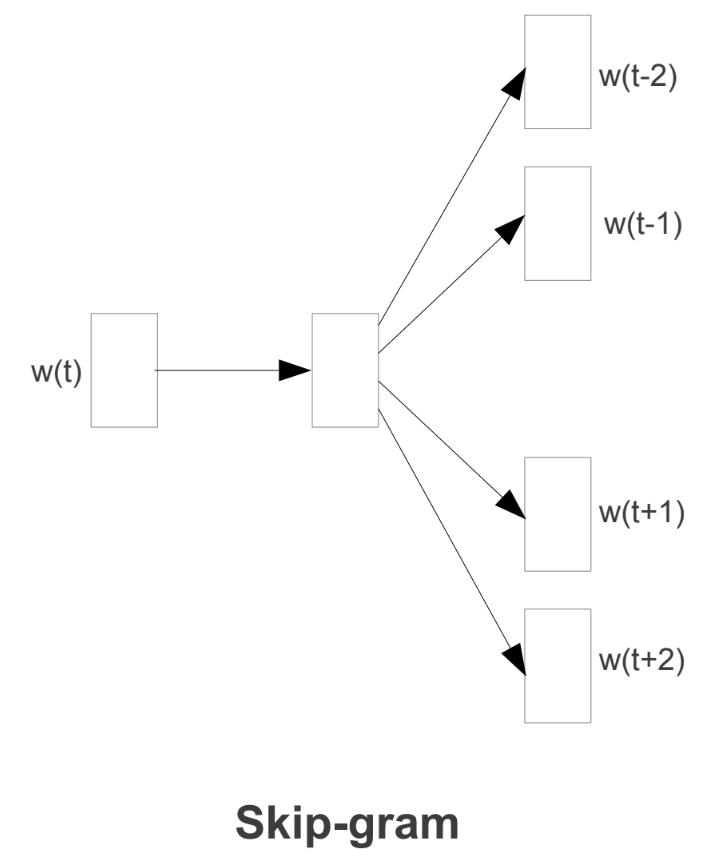

In [12]:
Image('../images/SkipGram.png', width=420, height=420)

### FastText
[FastText paper](https://arxiv.org/pdf/1607.04606.pdf). 
But are more approchable explanation can be found [here](https://amitness.com/2020/06/fasttext-embeddings/):<br>
While Glove and Word2Vec work on the word-level, FastText is working on a n-gram level. In this way it is learning the internal structure of words. Thus, FastText has no out-of-vocabulary words (those not present during training) and is able to learn similarities by the word stems.

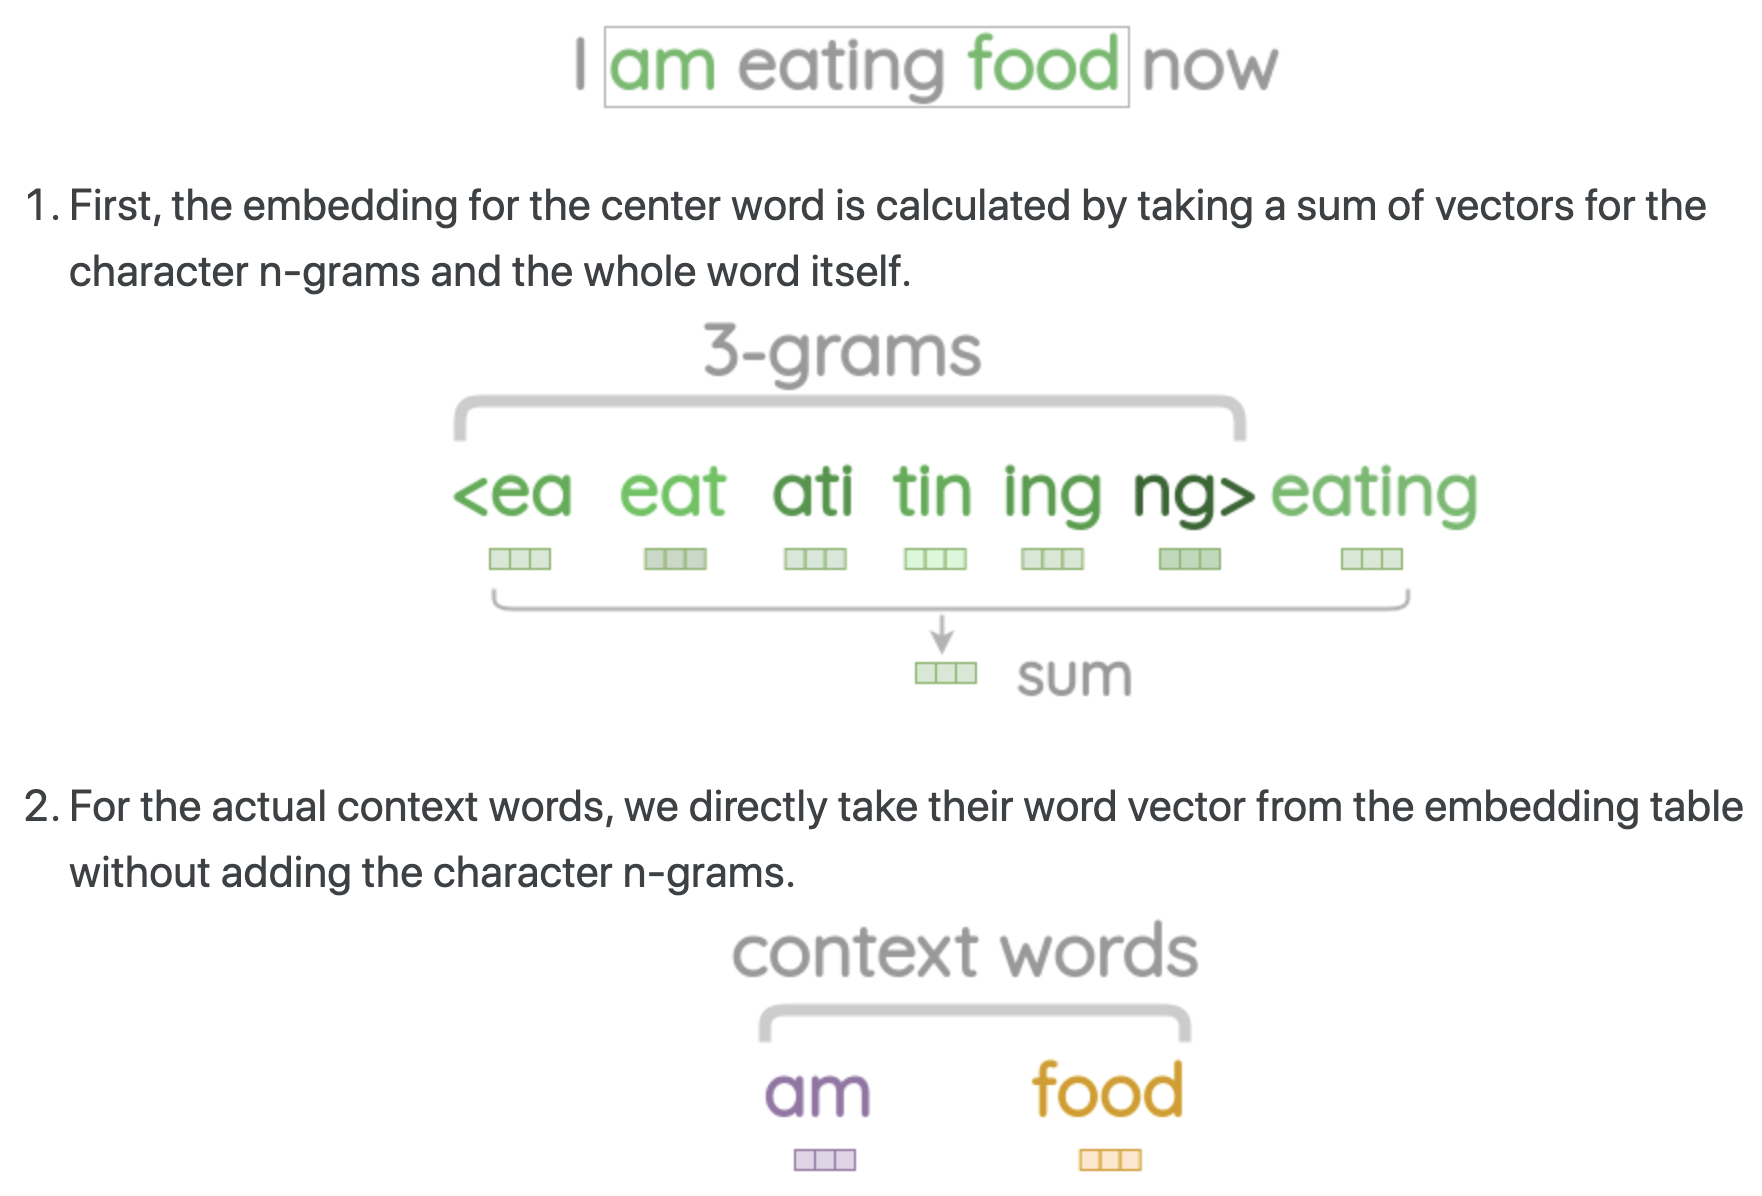

In [28]:
Image('../images/FastText1.png', width=640, height=420)

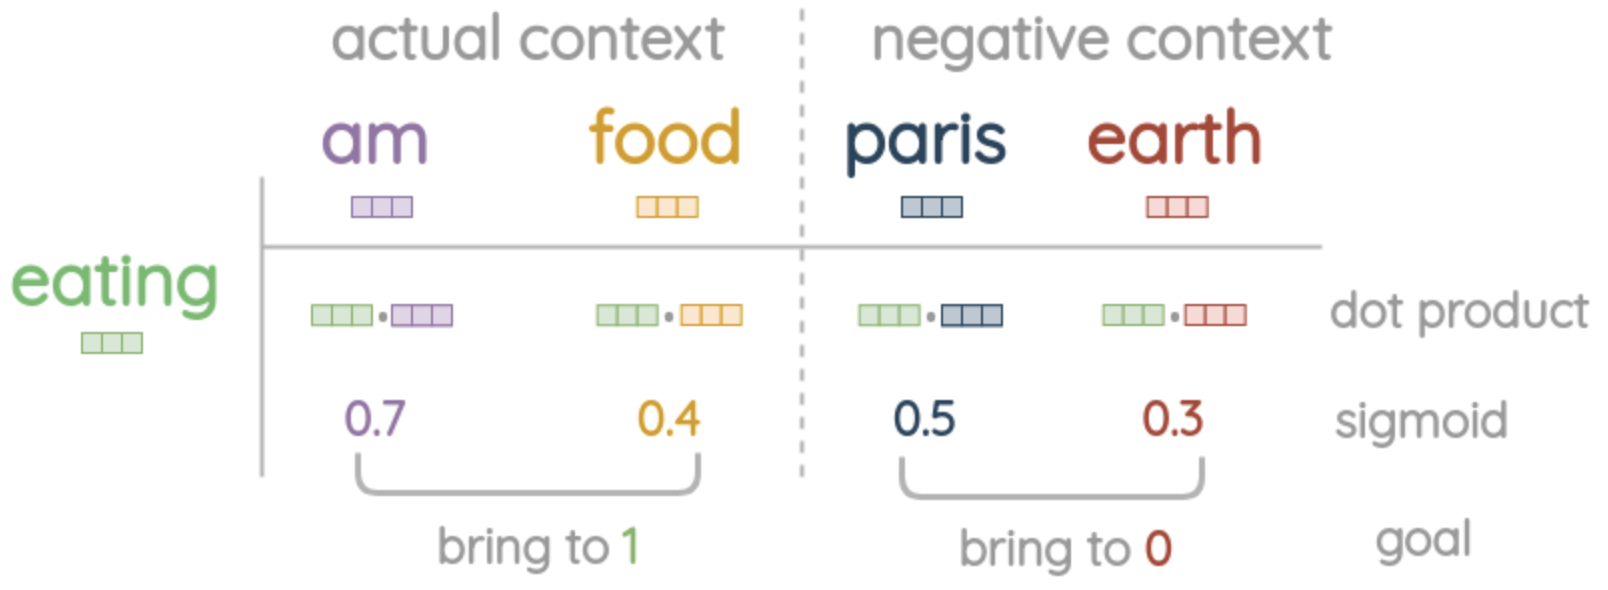

In [29]:
Image('../images/FastText2.png', width=640, height=420)

### BERT embeddings
BERT is a classical transformer encoding step. Instead of prediction the next word in a sentence (as done with recurrent neural networks such as LSTMs), it is predicting the masked words (ca.~15%). The information of the words present is shared among all positions in the network.<br>
The __[CLS]__ token signals the beginning of a new sentence (its embedding is often used for sentence classification).
The __[MASK]__ token signals the places where the correct word has to be guessed; __[PAD]__ is just to fill all input-sentences to the same length. This is more efficient since sentences can be batched together.

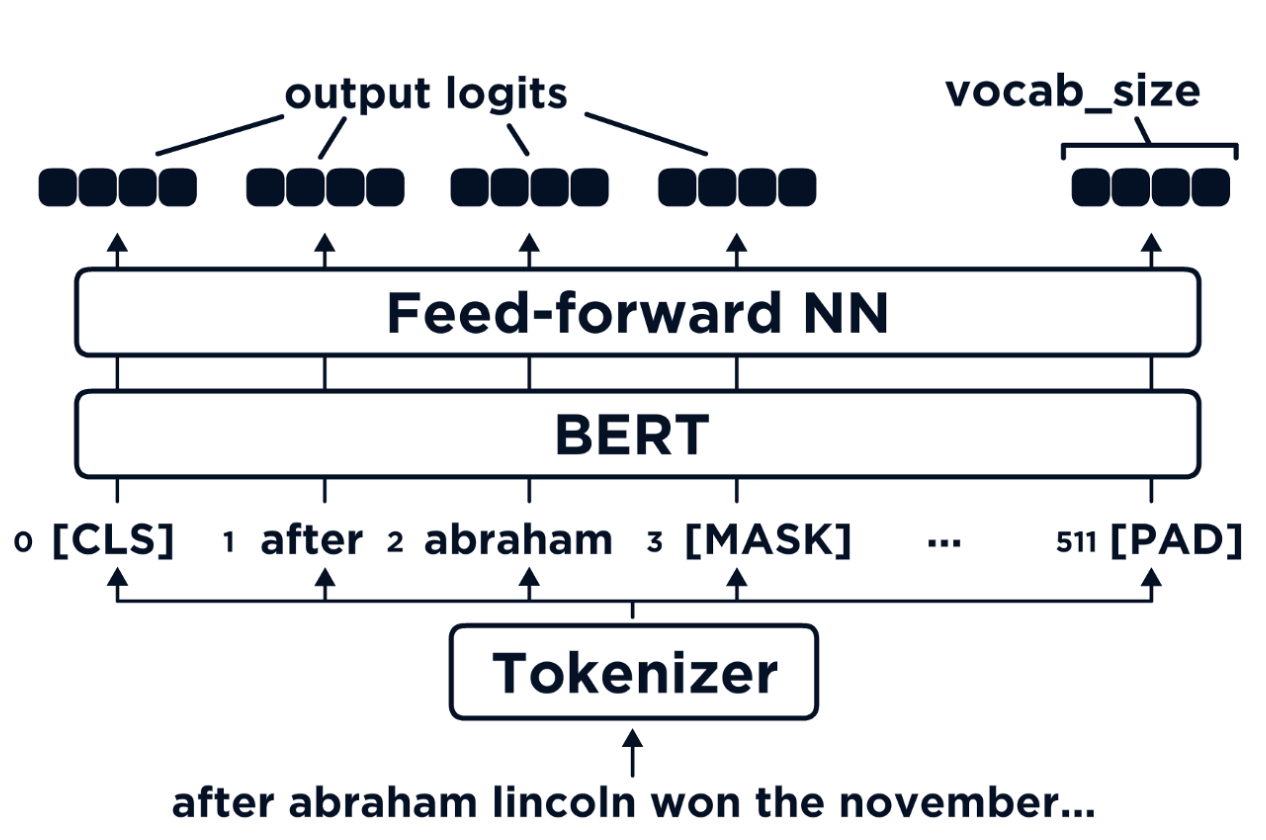

In [36]:
Image('../images/BERT1.png',width=480, height=320)

### Sentence-Transformers
The initial [paper](https://arxiv.org/pdf/1908.10084.pdf)

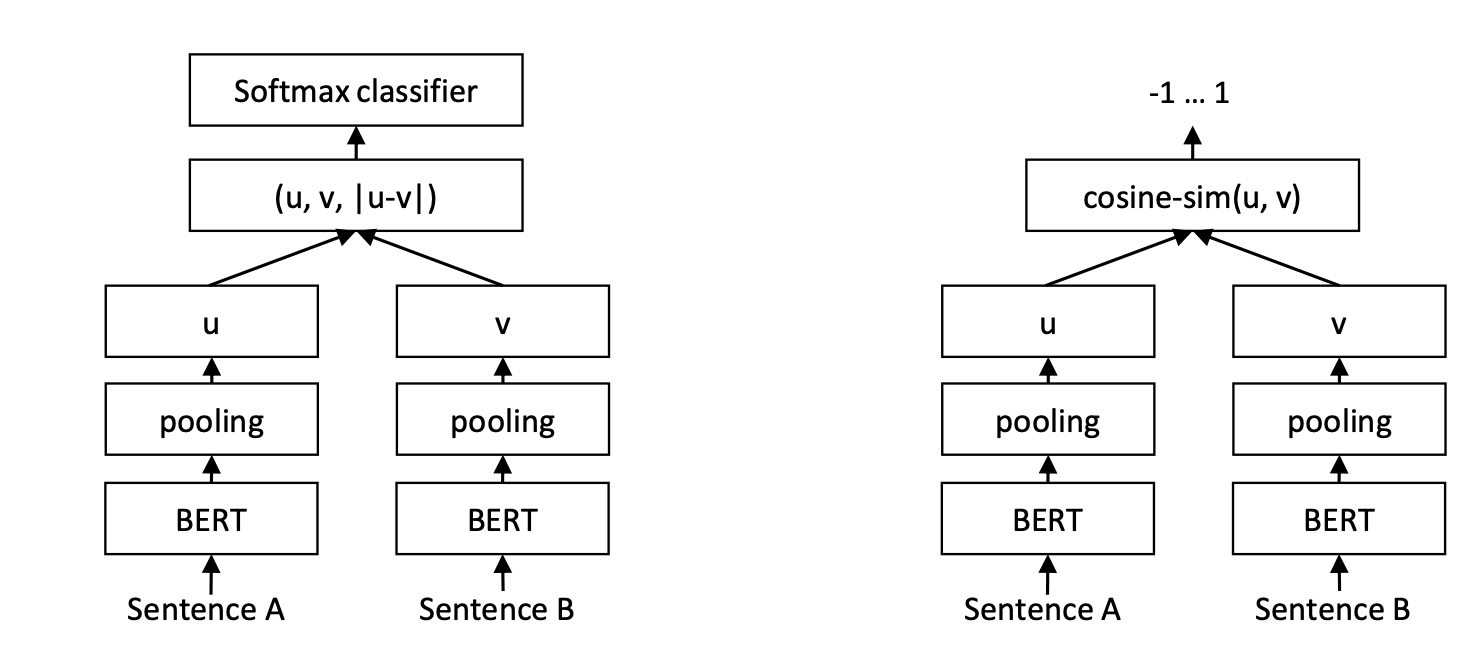

In [16]:
Image('../images/sentence-transformers1.png')

### Triplet-Loss
In each training step, there is a __anchor__ sentence and a __positive__ example that is semantically equivalent to the __anchor__ sentence. Moreover, there are __negative__ examples that are just random sentences not similar to the __anchor__ sentence.<br>
The so-called triplet-loss function pushes the __anchor__ and the __positive__ embeddings closer to each-other (cosine of 1) and the __anchor__ and the __negative__ embeddings as well as the __positive__ embeddings and the __negative__ embeddings further away from each-other (euclidean or cosine).

\begin{equation*}
L = \text{max}\left(\sum_i^N \left[(f_i^a - f_i^p)^2 - (f_i^a - f_i^n)^2 + \alpha\right], 0\right)
\end{equation*}
where $\alpha$ is the margin, the amount by which negative examples have to been further away from the anchor than positive examples.

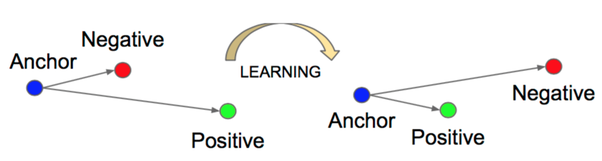

In [17]:
Image('../images/triplet_loss.png')

### multilingual sentence transformer
This is the [publication](https://arxiv.org/abs/2004.09813) on this ingenious idea.

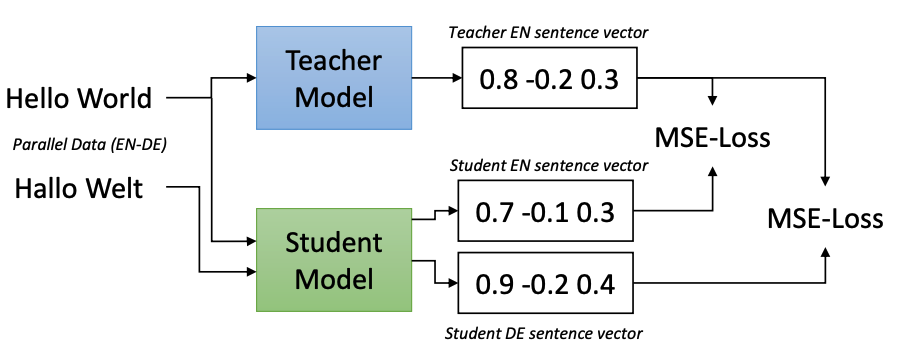

In [19]:
Image('../images/multi_sbert.png')

## Object Detection with the OpenImages v4 classes

The paper belonging to this project is [this](https://openaccess.thecvf.com/content/ICCV2021/papers/Narayan_Discriminative_Region-Based_Multi-Label_Zero-Shot_Learning_ICCV_2021_paper.pdf)<br>
The code is a slightly modified copy from the one in the corresponding [github-repository](https://github.com/akshitac8/BiAM)


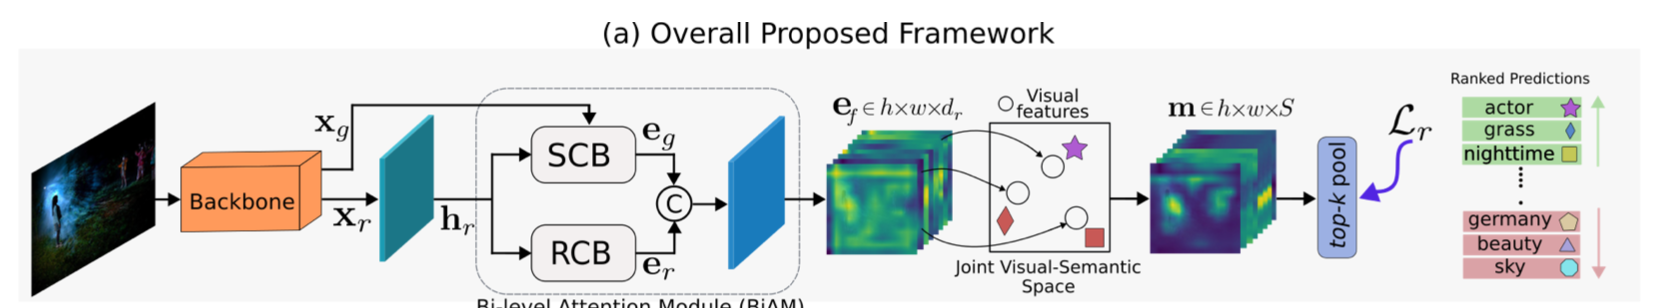

In [22]:
from IPython.display import Image
Image('../images/BiAM1.png')

### Understanding the Backbone
$\mathbf{x}_g$, the global or scene-context features as well as the regional features $\mathbf{x}_r$ are extracted for the different layers of an old-school VVG19 net.

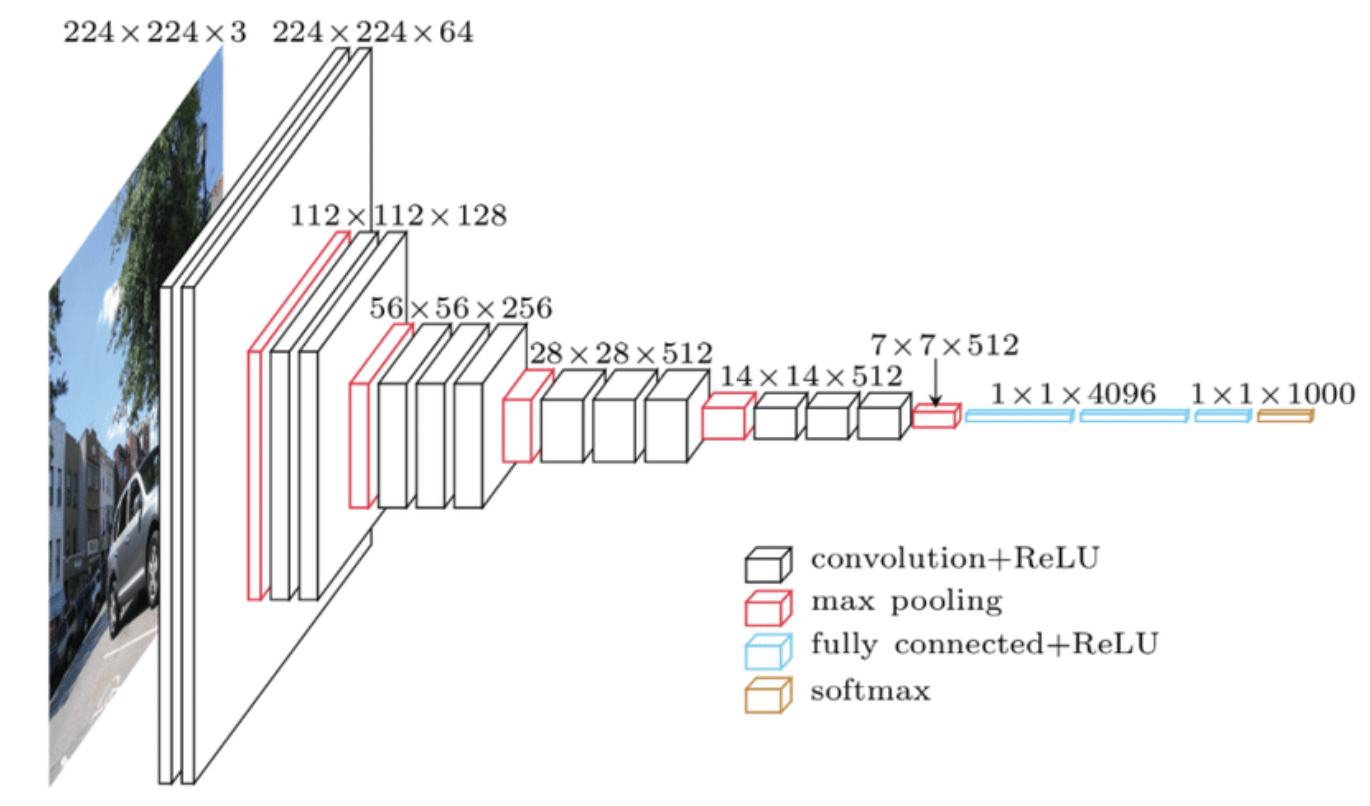

In [24]:
Image('../images/vgg1.png')

### Joint Visual-Semantic Space

The target of the BiAM-Network are the Glove-embeddings of the OpenImages-Labels. The Network is trained to output embedding-vectors that are as near as possible to the embeddings of the labels.<br>
This is also how the zero-shot learning takes place: New objects that are semantically similar to trained objects should have similar embeddings coming from BiAM. These embeddings are compared (cosine) with the Glove-embeddings of all possible objects (alos those not within the training set).

## OCR
 - easyocr
 - tesseract
 

 
### easyocr
[easyocr on github](https://github.com/JaidedAI/EasyOCR#api-documentation)<br>
The easyocr-Algorithm dates from [2015](https://arxiv.org/pdf/1507.05717.pdf). Considered, that we use neural networks, this is rather 'old'. However, for a first check, to see if the whole pipeline could work with OCR it's good enough. Perhaps it will turn out that it's even not the processing step in the pipeline that has to be improved upon the most.<br>
The model consists of several steps:<br>
1. a convolutional layer extracting feature maps (VGG is one of the most often used networks for this task)
2. the vectors (columns) representing the different positions in the input image are fed to a Recurrent Neural Network (RNN) (LSTM). This RNN predicts the most probable sequence of characters (and blanks) over the input feature maps.
3. The Transcription Layer uses a 'dictionary approach' to clean the previous predictions and to return entire words.

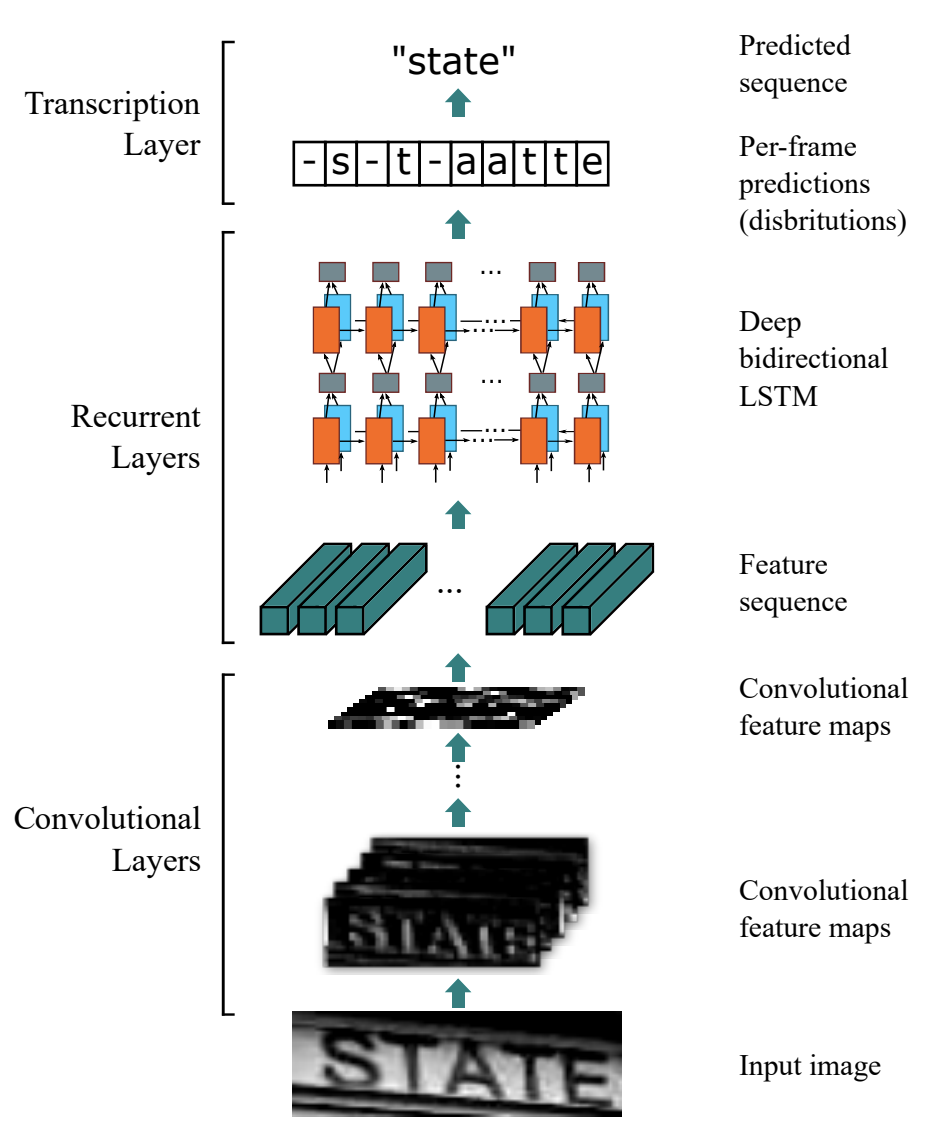

In [37]:
Image('../images/easyocr1.png', width=440, height=420)

### tesseract
Tesseract is around for more than 15 years. It is open-source and used in most non-commercial software with OCR-capabilities. In [2016](https://github.com/tesseract-ocr/docs/blob/main/das_tutorial2016/6ModernizationEfforts.pdf) a LSTM was added to its processing pipeline.<br>
Good explanations and instructions (also for installing) can be found [here](https://nanonets.com/blog/ocr-with-tesseract/).

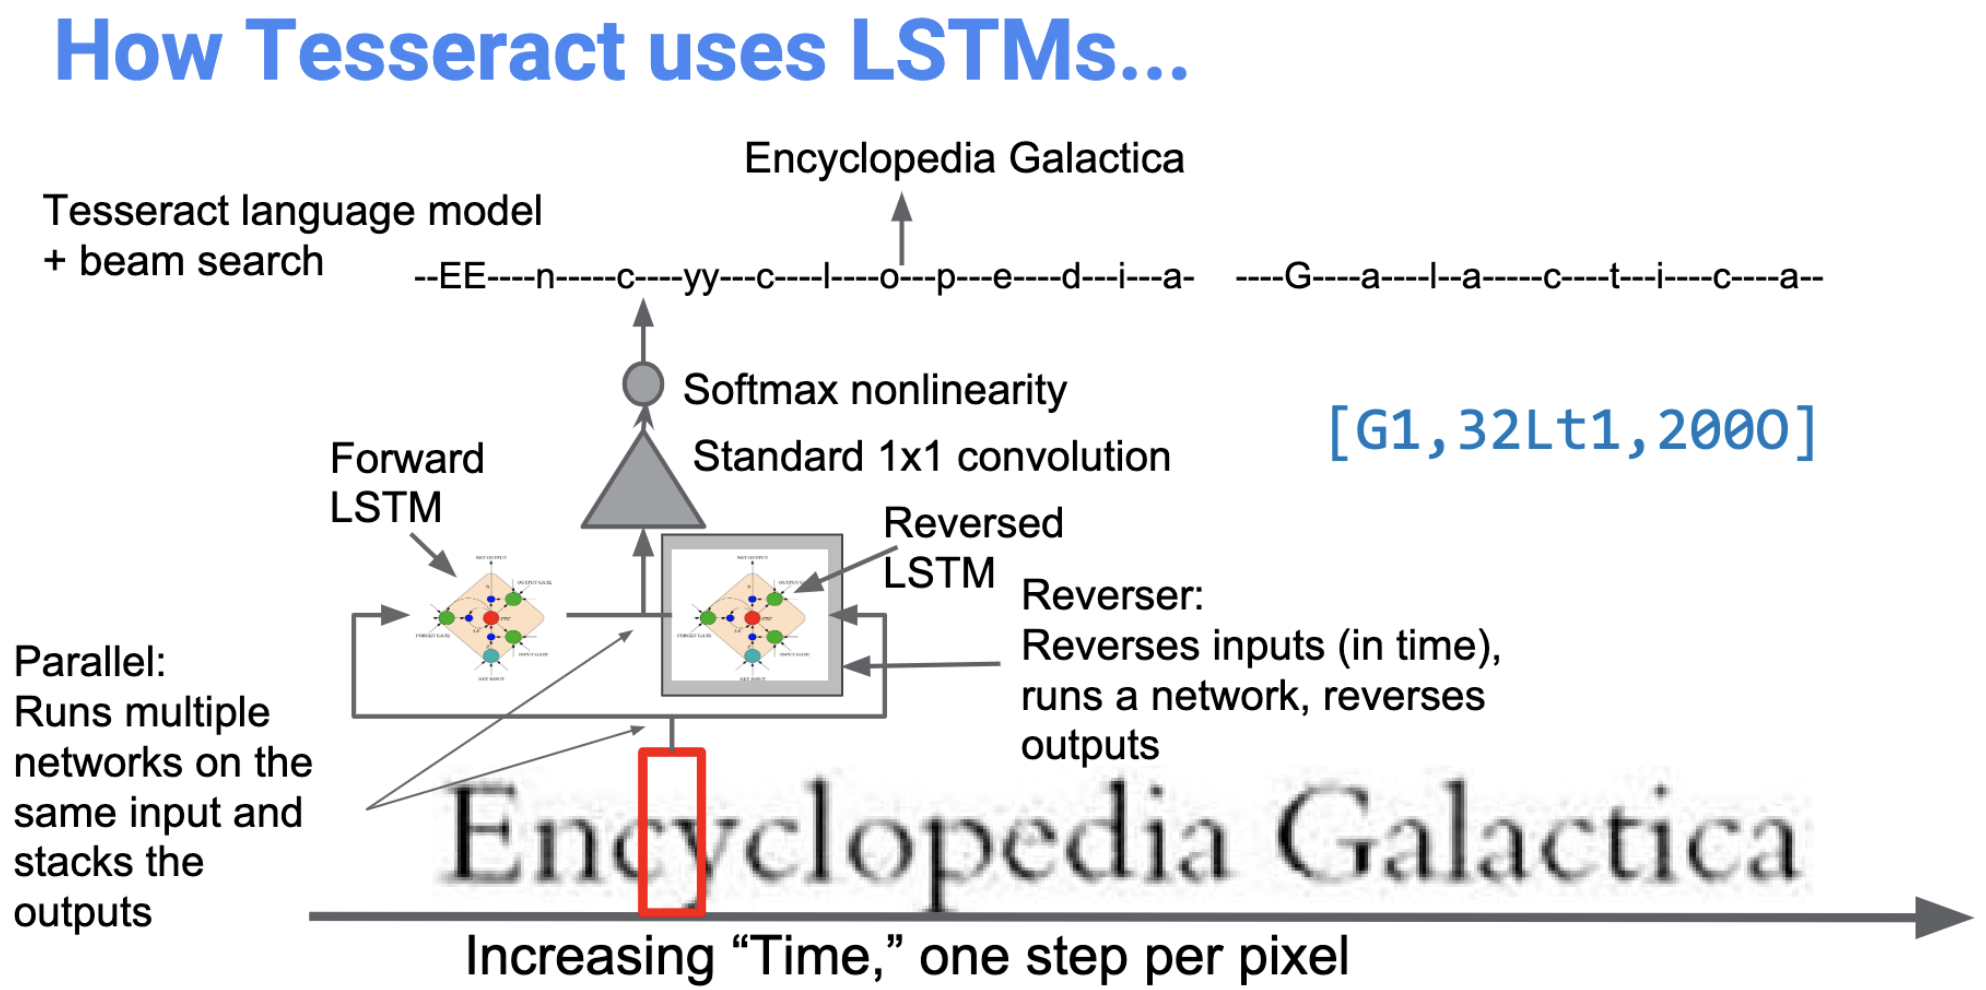

In [21]:
Image('../images/tessearct1.png')